# EDA – Exploración del Consumo Eléctrico
Este notebook analiza el dataset sintético de consumo eléctrico.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/consumo_sintetico.csv', parse_dates=['timestamp'])

df.head()

,timestamp,consumo,temperatura
0,2023-01-01 00:00:00,206.8768,15.9934
1,2023-01-01 01:00:00,204.5297,14.7235
2,2023-01-01 02:00:00,205.1761,16.2954
3,2023-01-01 03:00:00,212.8985,18.0461
4,2023-01-01 04:00:00,223.4037,14.5317


In [9]:
# ============================================
#   PROYECTO A — ANÁLISIS EXPLORATORIO (EDA)
# ============================================

# -----------------------
# 1. Importación de librerías
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use("default")

# -----------------------
# 2. Cargar dataset
# -----------------------
df = pd.read_csv("../data/consumo_sintetico.csv", parse_dates=["timestamp"])
df = df.set_index("timestamp")

print("Shape del dataset:", df.shape)
df.head()


Shape del dataset: (8760, 2)


,consumo,temperatura
timestamp,,
2023-01-01 00:00:00,206.8768,15.9934
2023-01-01 01:00:00,204.5297,14.7235
2023-01-01 02:00:00,205.1761,16.2954
2023-01-01 03:00:00,212.8985,18.0461
2023-01-01 04:00:00,223.4037,14.5317


In [10]:
# -----------------------
# 3. Información inicial
# -----------------------
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2023-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumo      8760 non-null   float64
 1   temperatura  8760 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


,count,mean,std,min,25%,50%,75%,max
consumo,8760.0,233.541834,32.396090,130.4034,210.953075,234.46985,257.322900,314.0687
temperatura,8760.0,14.998894,7.390634,-0.6517,8.198425,15.07800,21.860625,31.6526


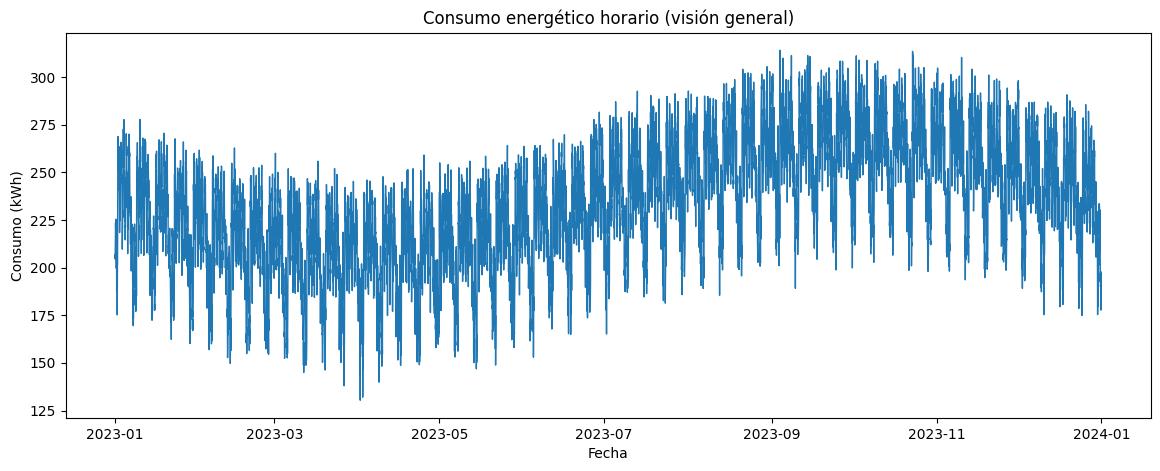

In [11]:
# -----------------------
# 4. Visualización inicial del consumo
# -----------------------
plt.figure(figsize=(14,5))
plt.plot(df["consumo"], linewidth=1)
plt.title("Consumo energético horario (visión general)")
plt.xlabel("Fecha")
plt.ylabel("Consumo (kWh)")
plt.show()


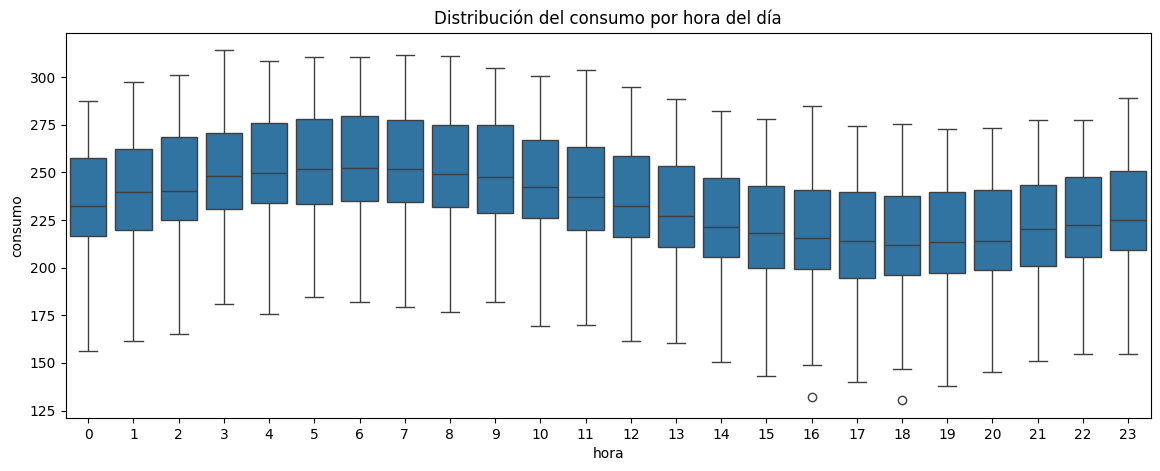

In [12]:
# -----------------------
# 5. Boxplots por hora del día
# -----------------------
df["hora"] = df.index.hour

plt.figure(figsize=(14,5))
sns.boxplot(data=df, x="hora", y="consumo")
plt.title("Distribución del consumo por hora del día")
plt.show()


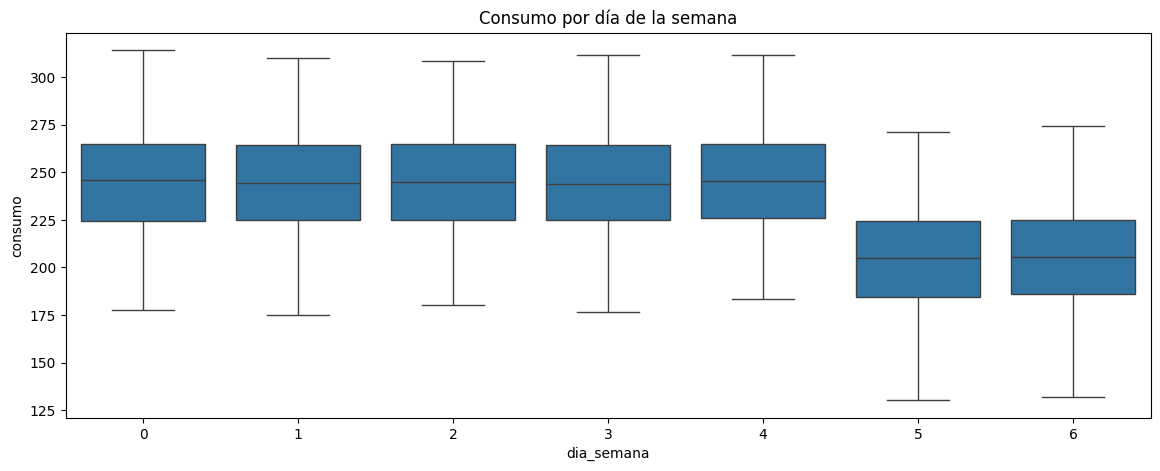

In [13]:
# -----------------------
# 6. Boxplot por día de la semana
# -----------------------
df["dia_semana"] = df.index.dayofweek  # 0 = lunes

plt.figure(figsize=(14,5))
sns.boxplot(data=df, x="dia_semana", y="consumo")
plt.title("Consumo por día de la semana")
plt.show()


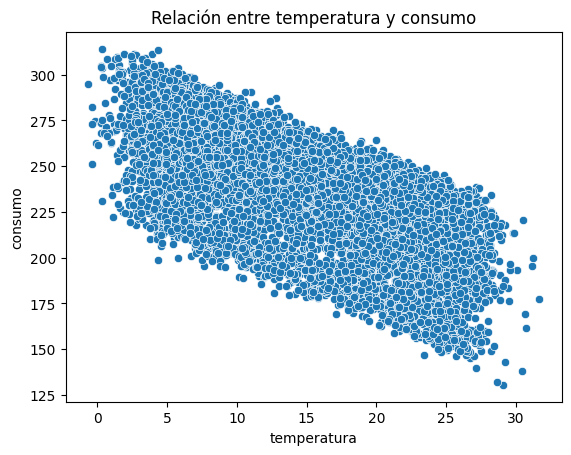

,consumo,temperatura
consumo,1.000000,-0.687802
temperatura,-0.687802,1.000000


In [14]:
# -----------------------
# 7. Correlación consumo - temperatura
# -----------------------
sns.scatterplot(data=df, x="temperatura", y="consumo")
plt.title("Relación entre temperatura y consumo")
plt.show()

df[["consumo", "temperatura"]].corr()


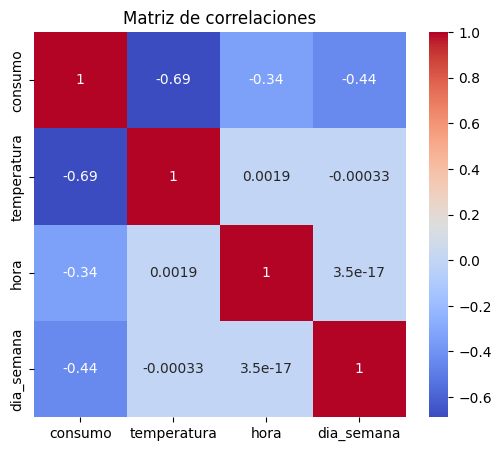

In [15]:
# -----------------------
# 8. Matriz de correlación completa
# -----------------------
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlaciones")
plt.show()


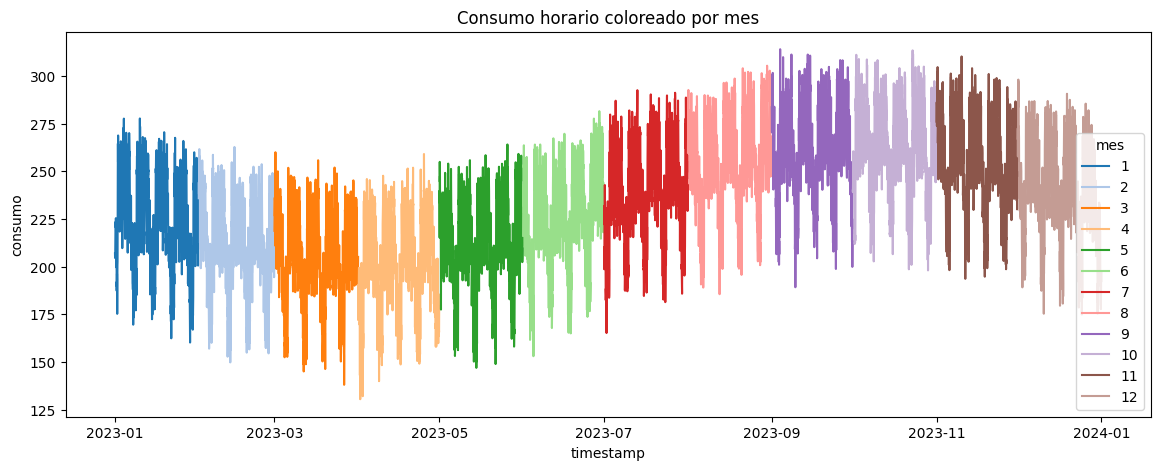

In [16]:
# -----------------------
# 9. Series temporales por meses
# -----------------------
df["mes"] = df.index.month

plt.figure(figsize=(14,5))
sns.lineplot(data=df, x=df.index, y="consumo", hue="mes", palette="tab20")
plt.title("Consumo horario coloreado por mes")
plt.show()


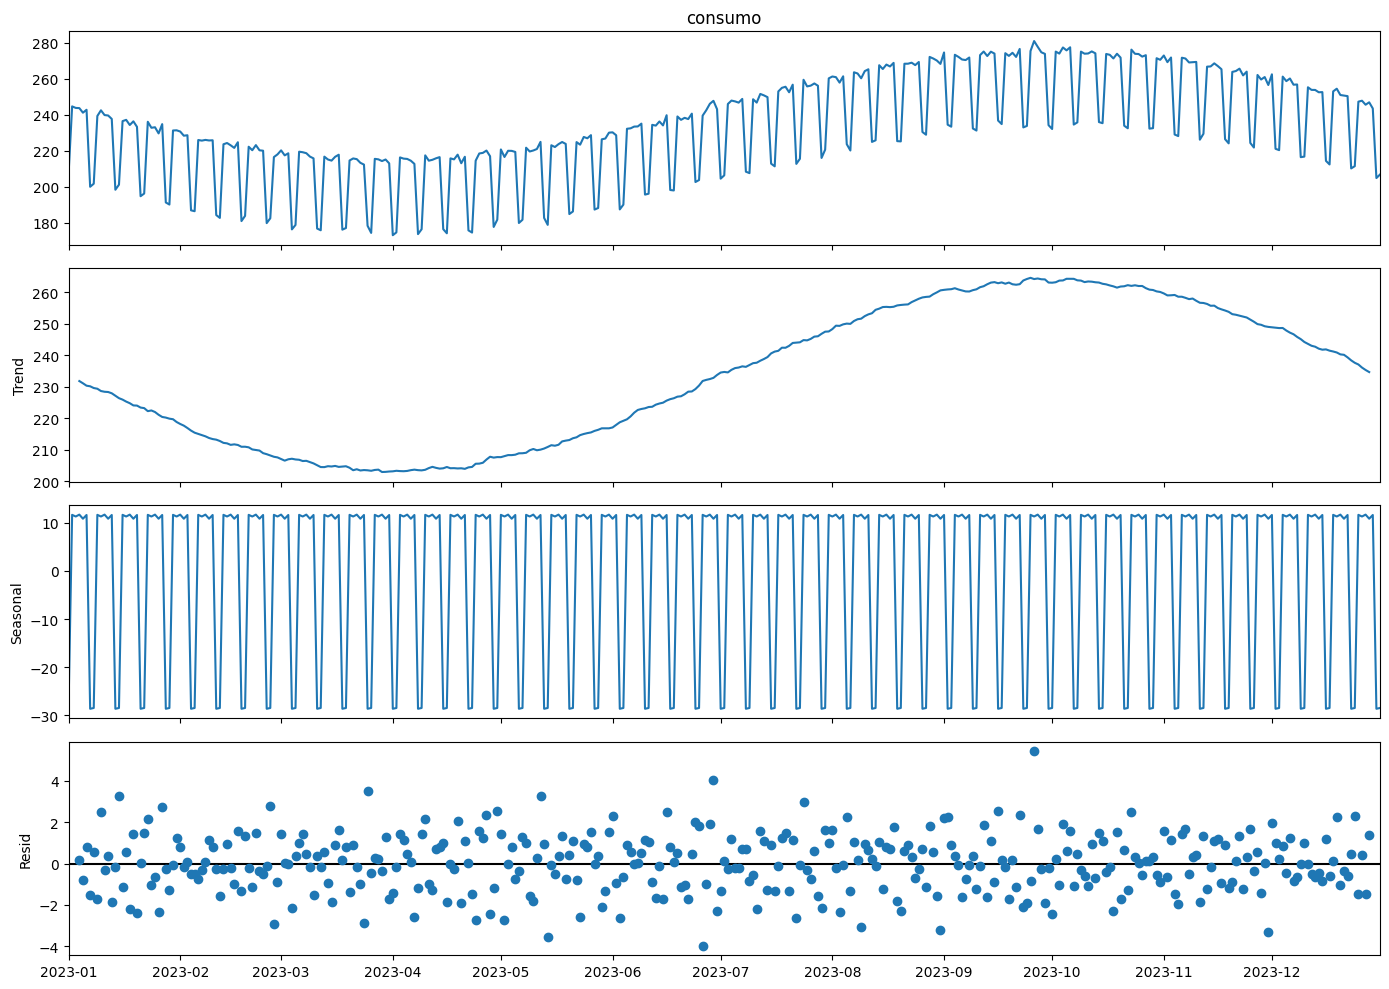

In [17]:
# -----------------------
# 10. Descomposición de la serie
# -----------------------
df_resampled = df["consumo"].resample("D").mean()

result = seasonal_decompose(df_resampled, model="additive", period=7)

plt.rcParams.update({'figure.figsize': (14,10)})
result.plot()
plt.show()


In [18]:
# -----------------------
# 11. Resumen de insights
# -----------------------

print("""
INSIGHTS PRELIMINARES:

1. Se observa un patrón diario claro: mayor consumo en horas laborales.
2. Existe estacionalidad semanal: menor consumo en fines de semana.
3. La temperatura muestra correlación moderada con el consumo energético.
4. El consumo promedio cambia entre meses (estacionalidad estacional más suave).
5. Se detectan picos atípicos (outliers), útiles para modelos robustos.

El dataset es adecuado para modelos SARIMA y Machine Learning.
""")



INSIGHTS PRELIMINARES:

1. Se observa un patrón diario claro: mayor consumo en horas laborales.
2. Existe estacionalidad semanal: menor consumo en fines de semana.
3. La temperatura muestra correlación moderada con el consumo energético.
4. El consumo promedio cambia entre meses (estacionalidad estacional más suave).
5. Se detectan picos atípicos (outliers), útiles para modelos robustos.

El dataset es adecuado para modelos SARIMA y Machine Learning.

